In [1]:
import pandas as pd

In [4]:
df = pd.read_csv('../../data/vehicle.csv')
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,van
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,van
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,car
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,van
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,bus


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 846 entries, 0 to 845
Data columns (total 19 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   compactness                  846 non-null    int64  
 1   circularity                  841 non-null    float64
 2   distance_circularity         842 non-null    float64
 3   radius_ratio                 840 non-null    float64
 4   pr.axis_aspect_ratio         844 non-null    float64
 5   max.length_aspect_ratio      846 non-null    int64  
 6   scatter_ratio                845 non-null    float64
 7   elongatedness                845 non-null    float64
 8   pr.axis_rectangularity       843 non-null    float64
 9   max.length_rectangularity    846 non-null    int64  
 10  scaled_variance              843 non-null    float64
 11  scaled_variance.1            844 non-null    float64
 12  scaled_radius_of_gyration    844 non-null    float64
 13  scaled_radius_of_gyr

In [8]:
df['class'].value_counts()

class
car    429
bus    218
van    199
Name: count, dtype: int64

In [9]:
#count the number of missing values in each column
df.isnull().sum()

compactness                    0
circularity                    5
distance_circularity           4
radius_ratio                   6
pr.axis_aspect_ratio           2
max.length_aspect_ratio        0
scatter_ratio                  1
elongatedness                  1
pr.axis_rectangularity         3
max.length_rectangularity      0
scaled_variance                3
scaled_variance.1              2
scaled_radius_of_gyration      2
scaled_radius_of_gyration.1    4
skewness_about                 6
skewness_about.1               1
skewness_about.2               1
hollows_ratio                  0
class                          0
dtype: int64

In [10]:
#drop the rows with missing values
df = df.dropna()

In [11]:
df.isnull().sum()

compactness                    0
circularity                    0
distance_circularity           0
radius_ratio                   0
pr.axis_aspect_ratio           0
max.length_aspect_ratio        0
scatter_ratio                  0
elongatedness                  0
pr.axis_rectangularity         0
max.length_rectangularity      0
scaled_variance                0
scaled_variance.1              0
scaled_radius_of_gyration      0
scaled_radius_of_gyration.1    0
skewness_about                 0
skewness_about.1               0
skewness_about.2               0
hollows_ratio                  0
class                          0
dtype: int64

In [13]:
# encode the class labels
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['class'] = le.fit_transform(df['class'])
df.head()

,compactness,circularity,distance_circularity,radius_ratio,pr.axis_aspect_ratio,max.length_aspect_ratio,scatter_ratio,elongatedness,pr.axis_rectangularity,max.length_rectangularity,scaled_variance,scaled_variance.1,scaled_radius_of_gyration,scaled_radius_of_gyration.1,skewness_about,skewness_about.1,skewness_about.2,hollows_ratio,class
0,95,48.0,83.0,178.0,72.0,10,162.0,42.0,20.0,159,176.0,379.0,184.0,70.0,6.0,16.0,187.0,197,2
1,91,41.0,84.0,141.0,57.0,9,149.0,45.0,19.0,143,170.0,330.0,158.0,72.0,9.0,14.0,189.0,199,2
2,104,50.0,106.0,209.0,66.0,10,207.0,32.0,23.0,158,223.0,635.0,220.0,73.0,14.0,9.0,188.0,196,1
3,93,41.0,82.0,159.0,63.0,9,144.0,46.0,19.0,143,160.0,309.0,127.0,63.0,6.0,10.0,199.0,207,2
4,85,44.0,70.0,205.0,103.0,52,149.0,45.0,19.0,144,241.0,325.0,188.0,127.0,9.0,11.0,180.0,183,0


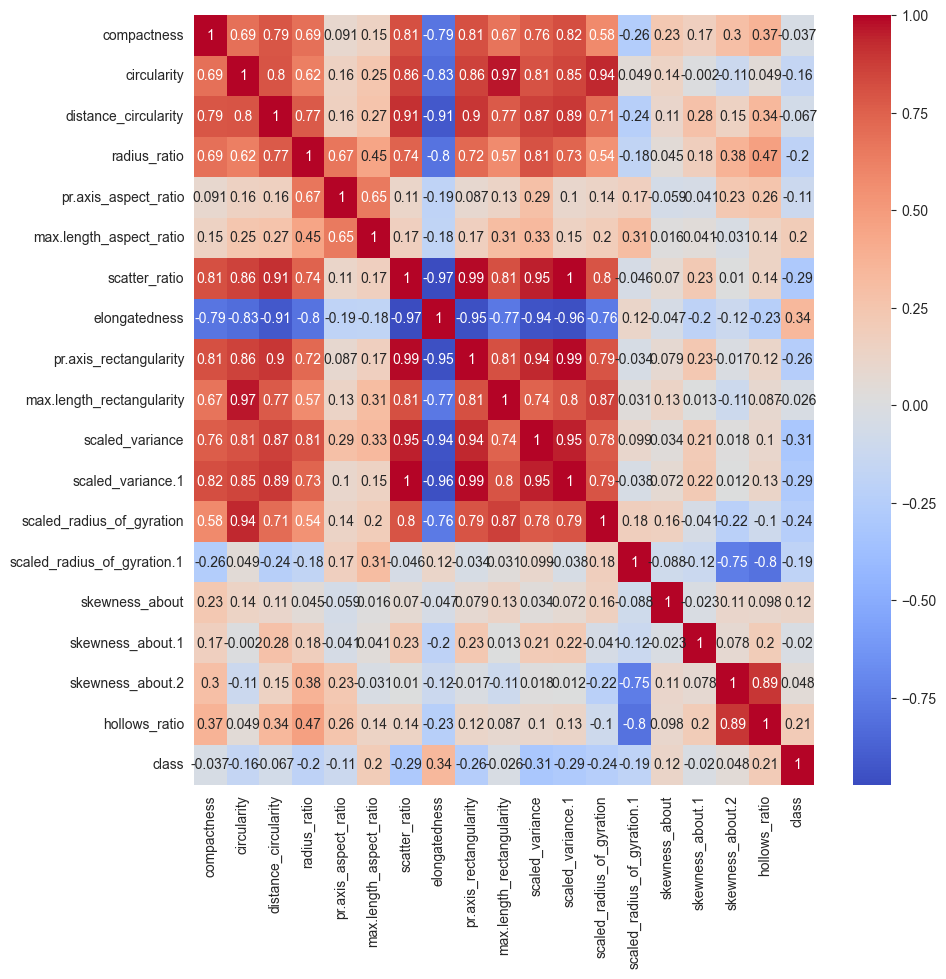

In [14]:
# plot the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.show()

In [15]:
# scale the columns
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X = df.drop('class', axis=1)
y = df['class']
X = scaler.fit_transform(X)

In [16]:
# split the data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [19]:
# train knn model
from sklearn.metrics import classification_report, accuracy_score, f1_score
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=3)
knn = knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

# Precision, recall, f-score from the multi-class support function
print(classification_report(y_test, y_pred))
print('Accuracy score: ', accuracy_score(y_test, y_pred))
print('F1 Score: ', f1_score(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97        36
           1       0.99      0.93      0.96        97
           2       0.85      0.97      0.91        30

    accuracy                           0.95       163
   macro avg       0.93      0.96      0.95       163
weighted avg       0.95      0.95      0.95       163

Accuracy score:  0.950920245398773


ValueError: Target is multiclass but average='binary'. Please choose another average setting, one of [None, 'micro', 'macro', 'weighted'].

In [20]:
# knn with different k values
k_values = [3, 5, 7, 9, 11, 13, 15]
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy score for k =', k, 'is:', accuracy_score(y_test, y_pred))

Accuracy score for k = 3 is: 0.950920245398773
Accuracy score for k = 5 is: 0.9447852760736196
Accuracy score for k = 7 is: 0.9447852760736196
Accuracy score for k = 9 is: 0.950920245398773
Accuracy score for k = 11 is: 0.9325153374233128
Accuracy score for k = 13 is: 0.9263803680981595
Accuracy score for k = 15 is: 0.901840490797546


In [21]:
# knn with different distance metrics

metrics = ['euclidean', 'manhattan', 'chebyshev', 'minkowski']
for metric in metrics:
    knn = KNeighborsClassifier(n_neighbors=3, metric=metric)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy score for metric =', metric, 'is:', accuracy_score(y_test, y_pred))

Accuracy score for metric = euclidean is: 0.950920245398773
Accuracy score for metric = manhattan is: 0.9447852760736196
Accuracy score for metric = chebyshev is: 0.8895705521472392
Accuracy score for metric = minkowski is: 0.950920245398773


In [22]:
# knn with different weights
weights = ['uniform', 'distance']
for weight in weights:
    knn = KNeighborsClassifier(n_neighbors=3, weights=weight)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy score for weight =', weight, 'is:', accuracy_score(y_test, y_pred))

Accuracy score for weight = uniform is: 0.950920245398773
Accuracy score for weight = distance is: 0.950920245398773


In [23]:
# knn with different leaf_size
leaf_size = [10, 20, 30, 40, 50]
for size in leaf_size:
    knn = KNeighborsClassifier(n_neighbors=3, leaf_size=size)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy score for leaf_size =', size, 'is:', accuracy_score(y_test, y_pred))

Accuracy score for leaf_size = 10 is: 0.950920245398773
Accuracy score for leaf_size = 20 is: 0.950920245398773
Accuracy score for leaf_size = 30 is: 0.950920245398773
Accuracy score for leaf_size = 40 is: 0.950920245398773
Accuracy score for leaf_size = 50 is: 0.950920245398773


In [24]:
# knn with different algorithm
algorithms = ['auto', 'ball_tree', 'kd_tree', 'brute']
for algo in algorithms:
    knn = KNeighborsClassifier(n_neighbors=3, algorithm=algo)
    knn = knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    print('Accuracy score for algorithm =', algo, 'is:', accuracy_score(y_test, y_pred))

Accuracy score for algorithm = auto is: 0.950920245398773
Accuracy score for algorithm = ball_tree is: 0.950920245398773
Accuracy score for algorithm = kd_tree is: 0.950920245398773
Accuracy score for algorithm = brute is: 0.950920245398773
